In [ ]:
from pathlib import Path
import json
import itertools
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
prefix = "DD25"       # set to TDD for Thawing Degree Days

tdd_anomalycorr = f"/Users/christine/Projects/2023_Riverice/data/breakupdata/derived/{prefix}_anomaly_correlations.csv"
breakup_stats = "/Users/christine/Projects/2023_Riverice/data/breakupdata/derived/breakupdate_mean_std_1983_2022.csv"
breakupdata = Path('/Users/christine/Projects/2023_Riverice/data/breakupdata/')
stationfolder = Path(f"/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
outfolder = Path("/Users/christine/Projects/2023_Riverice/data/breakupdata/derived/")

Rename station names

In [ ]:
anomalycorrDF = pd.read_csv(tdd_anomalycorr, header=3, index_col=0)
anomalycorrDF

,date,stationname,location,r2,r,p,DateStamp
0,04-01,ALYESKA,Koyukuk River at Bettles,0.006324,0.079526,0.635067,2000-04-01
1,04-01,ANCHORAGE_MERRILL_FIELD,Koyukuk River at Bettles,0.000352,-0.018763,0.929067,2000-04-01
2,04-01,ANCHORAGE_TED_STEVENS_INTL_AP,Koyukuk River at Bettles,0.004262,0.065284,0.685092,2000-04-01
3,04-01,AUKE_BAY,Koyukuk River at Bettles,0.005658,0.075220,0.644580,2000-04-01
4,04-01,BARROW_AP,Koyukuk River at Bettles,0.009983,0.099915,0.534245,2000-04-01
...,...,...,...,...,...,...,...
98600,06-04,SITKA_AP,Gakona River at Gakona,0.115278,-0.339527,0.049471,2000-06-04
98601,06-04,SKAGWAY_AP,Gakona River at Gakona,0.065209,-0.255361,0.208012,2000-06-04
98602,06-04,TALKEETNA_AP,Gakona River at Gakona,0.324413,-0.569573,0.000438,2000-06-04
98603,06-04,TANANA_AP,Gakona River at Gakona,0.093829,-0.306316,0.082962,2000-06-04


### Prototyping: Eagle

In [ ]:
location = 'Yukon River at Eagle'

In [ ]:
eagleDF = anomalycorrDF[anomalycorrDF.location == location]
eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')
eagleDF

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_42694/121066999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')


,date,stationname,location,r2,r,p,DateStamp
1147,04-01,ALYESKA,Yukon River at Eagle,0.039465,-0.198657,2.253684e-01,2000-04-01
1148,04-01,ANCHORAGE_MERRILL_FIELD,Yukon River at Eagle,0.076806,-0.277139,1.798554e-01,2000-04-01
1149,04-01,ANCHORAGE_TED_STEVENS_INTL_AP,Yukon River at Eagle,0.015018,-0.122547,4.337033e-01,2000-04-01
1150,04-01,AUKE_BAY,Yukon River at Eagle,0.019506,-0.139664,3.776966e-01,2000-04-01
1151,04-01,BARROW_AP,Yukon River at Eagle,0.007911,-0.088945,5.705863e-01,2000-04-01
...,...,...,...,...,...,...,...
98267,06-04,SITKA_AP,Yukon River at Eagle,0.301944,-0.549494,1.354453e-04,2000-06-04
98268,06-04,SKAGWAY_AP,Yukon River at Eagle,0.295278,-0.543395,1.082957e-03,2000-06-04
98269,06-04,TALKEETNA_AP,Yukon River at Eagle,0.438530,-0.662216,1.321208e-06,2000-06-04
98270,06-04,TANANA_AP,Yukon River at Eagle,0.587404,-0.766423,3.290229e-09,2000-06-04


In [ ]:
grouped = eagleDF.drop(
        columns=['date', 'location', 'r', 'p']).groupby(
                ['stationname', pd.Grouper(key='DateStamp', freq='15D')]).mean().reset_index()

In [ ]:
max4 = (
    grouped
        .groupby(['DateStamp'])
        .apply(lambda group: group.nlargest(4, columns='r2'))
).reset_index(drop=True)

In [ ]:
datestamps = ['2000-04-01', '2000-04-16',
       '2000-05-01', '2000-05-16']

In [ ]:
sites = set()
maxN = 10
for datestamp in datestamps:
    for station in max4[max4.DateStamp== datestamp].stationname.to_list():
        if station == 'COLLEGE_OBSERVATORY':
            continue
        if station not in sites:
            break
    print(station)
    sites.add(station)
    if len(sites) == maxN:
        break 

FAIRBANKS_INTL_AP
EAGLE
CHICKEN
TANANA_AP


In [ ]:
sites

{'CHICKEN', 'EAGLE', 'FAIRBANKS_INTL_AP', 'TANANA_AP'}

In [ ]:
def restore_stationnames(stationlst):
    return [
        item.replace('AP', 'AIRPORT')           # .replace('INTL', 'INTERNATIONAL')
        for item in stationlst
        ]

sites1 = list(sites)
# sites1 = restore_stationnames(sites1)
sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AP', 'NENANA_MUN_AP']
# sites2 = restore_stationnames(sites2)
sites1, sites2

(['TANANA_AP', 'EAGLE', 'FAIRBANKS_INTL_AP', 'CHICKEN'],
 ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AP', 'NENANA_MUN_AP'])

In [ ]:
stationsdfs = {}
stationfolder = Path(f"/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
for station in sites1:
    stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)

In [ ]:
stationsdfs.keys()

dict_keys(['TANANA_AP', 'EAGLE', 'FAIRBANKS_INTL_AP', 'CHICKEN'])

In [ ]:
# sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTAa_AP', 'NENANA_MUN_AP']
# stationsdfs = {}
# stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
# for station in sites2:
#     stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)

In [ ]:
stationsdfs['FAIRBANKS_INTL_AP']

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1966.0,2059.0,1707.0,2124.5,1907.0,1627.5,1850.0,2134.0,2224.5,1960.5,...,1703.0,2016.5,2259.0,2371.0,2072.0,1863.5,2409.0,2055.5,2108.5,1915.5
118,2004.0,2084.5,1752.0,2169.5,1943.5,1663.0,1892.0,2171.0,2260.5,1995.0,...,1752.5,2045.5,2290.0,2405.5,2113.5,1902.5,2449.0,2090.5,2146.5,1957.0
119,2036.0,2110.5,1797.0,2211.5,1982.5,1699.5,1938.0,2210.0,2300.0,2031.0,...,1800.0,2080.0,2324.5,2444.0,2155.0,1939.0,2495.5,2125.0,2183.0,1997.0


In [ ]:
mean_eagle = pd.concat(stationsdfs.values())
mean_eagle = mean_eagle.groupby(mean_eagle.index).mean()
mean_eagle

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1995
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.833333,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.166667,0.000000,...,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000000,0.000
1,0.000000,2.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333,0.000000,...,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000000,0.000
2,0.000000,2.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,0.000000,...,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000000,0.750
3,0.000000,2.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,0.000000,...,0.000,1.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000000,2.000
4,0.000000,2.166667,0.00,0.000000,2.000000,0.000000,0.000000,0.000000,6.500000,0.000000,...,0.000,2.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1821.166667,1896.666667,1574.00,1829.500000,1737.580000,1483.000000,1616.546667,1837.636667,2007.500000,1815.170000,...,1726.625,1947.750,2010.2575,1771.2500,1620.585,2054.120,1811.275,1780.560,1650.303333,2119.645
118,1858.833333,1926.000000,1618.00,1873.833333,1775.080000,1516.500000,1651.880000,1871.303333,2045.666667,1849.836667,...,1753.125,1981.625,2046.8825,1806.7500,1655.210,2090.245,1840.275,1815.435,1688.136667,2151.645
119,1895.333333,1950.166667,1662.00,1916.000000,1811.580000,1549.833333,1691.643333,1907.303333,2081.166667,1886.170000,...,1785.250,2011.500,2082.7575,1843.5600,1687.335,2131.370,1871.150,1849.560,1726.136667,2188.145


In [ ]:
outpath = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS_combined_DD")
whichsites = ', '.join(sites)
with open(outpath / f"{prefix}_combined_{location.replace(' ', '_')}.csv", 'w') as dst:
        dst.write(f"# Cumulative {prefix} averaged for {location}\n")
        dst.write(f"# Sites: {whichsites}\n")
        dst.write("#\n")
        mean_eagle.to_csv(dst, float_format='%.2f')

## Likelihoods for Eagle

In [ ]:
location = "Yukon River at Eagle"

In [ ]:
def datestr2dayssince(datestr, since='0301'):
    thedate = dt.datetime.strptime(datestr, '%Y-%m-%d').date()
    since_mth = int(since[:2])
    since_day = int(since[3:])
    since_date = dt.date(thedate.year, since_mth, since_day)
    return (thedate - since_date).days
def dayssince2date(days, year=2000, since='0301'):
    since_date = dt.datetime.strptime(f"{year}{since}", "%Y%m%d").date()
    return (since_date + dt.timedelta(days=days)).strftime("%m-%d")

In [ ]:
breakuppth = breakupdata / "derived/breakupDate_cleaned.csv"
breakup = pd.read_csv(breakuppth, header=3, index_col=0)
breakup = breakup[breakup.siteID == location].sort_values(by='year').reset_index(drop=True)
breakup['days_since_march1'] = breakup.apply(lambda row: datestr2dayssince(row.breakup), axis=1)
breakup

,id,siteID,year,breakup,days_since_march1
0,5330,Yukon River at Eagle,1980,1980-05-03,63
1,5331,Yukon River at Eagle,1981,1981-05-07,67
2,5332,Yukon River at Eagle,1982,1982-05-14,74
3,5333,Yukon River at Eagle,1983,1983-05-02,62
4,5334,Yukon River at Eagle,1984,1984-05-09,69
5,5335,Yukon River at Eagle,1985,1985-05-16,76
6,5336,Yukon River at Eagle,1986,1986-05-11,71
7,5337,Yukon River at Eagle,1987,1987-05-09,69
8,5338,Yukon River at Eagle,1988,1988-05-02,62
9,5339,Yukon River at Eagle,1989,1989-04-29,59


In [ ]:
breakup[breakup['days_since_march1']==65].year.to_list()

[2020]

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(30, 80):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            print(days_after_march_1, days_possible, mean_eagle[years].mean(axis=1)[days_after_march_1])
            records.append(
                {'forecast_day_past_march1': days_after_march_1,
                    'days_from_then': days,
                    'mean_DD': mean_eagle[years].mean(axis=1)[days_after_march_1]}
            )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF

30 55 54.166666666666664
30 56 51.875
30 57 6.875
30 58 12.5625
30 59 26.738095238095237
30 60 0.0
30 61 65.0
30 62 18.416666666666668
30 63 8.40625
30 64 0.625
30 65 24.0
30 66 20.9375
30 67 28.972222222222225
30 68 8.625
30 69 42.75
30 71 8.125
30 72 29.208333333333332
30 74 30.0
30 76 5.166666666666667
30 77 2.625
30 78 1.375
31 55 59.666666666666664
31 56 61.125
31 57 6.875
31 58 12.5625
31 59 31.434523809523814
31 60 0.5
31 61 69.625
31 62 18.5
31 63 13.5625
31 64 4.125
31 65 24.0
31 66 22.6875
31 67 29.472222222222225
31 68 9.28125
31 69 47.66666666666667
31 71 9.1875
31 72 29.208333333333332
31 74 30.0
31 76 5.166666666666667
31 77 4.625
31 78 1.375
32 55 62.666666666666664
32 56 66.75
32 57 6.875
32 58 12.5625
32 59 36.363095238095234
32 60 0.5
32 61 73.0625
32 62 19.0
32 63 19.614583333333336
32 64 8.5
32 65 24.375
32 66 24.0625
32 67 31.083333333333332
32 68 9.3125
32 69 50.416666666666664
32 71 9.25
32 72 30.208333333333332
32 74 30.0
32 76 5.166666666666667
32 77 4.625
32 7

,forecast_day_past_march1,days_from_then,mean_DD
0,30,25,54.166667
1,30,26,51.875000
2,30,27,6.875000
3,30,28,12.562500
4,30,29,26.738095
...,...,...,...
1045,79,-7,400.215833
1046,79,-5,474.750000
1047,79,-3,364.833333
1048,79,-2,197.875000


In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(10, 80):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            for year in years:
                # print(year, days_after_march_1, mean_eagle[year][days_after_march_1])
                records.append({
                    'forecast_day_past_march1': days_after_march_1,
                    'year': year,
                    'days_from_then': days,
                    'mean_DD': mean_eagle[year][days_after_march_1]}
                )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF['day_absolute_since_march_1'] = likelihoodDF['forecast_day_past_march1'] + likelihoodDF['days_from_then']
likelihoodDF['forecastdate'] = likelihoodDF['forecast_day_past_march1'].apply(dayssince2date)
likelihoodDF

,forecast_day_past_march1,year,days_from_then,mean_DD,day_absolute_since_march_1,forecastdate
0,10,1990,45,4.666667,55,03-11
1,10,2016,46,0.000000,56,03-11
2,10,2003,47,6.875000,57,03-11
3,10,1991,48,0.000000,58,03-11
4,10,2005,48,2.500000,58,03-11
...,...,...,...,...,...,...
3005,79,2001,-7,421.835000,72,05-19
3006,79,1982,-5,474.750000,74,05-19
3007,79,1985,-3,364.833333,76,05-19
3008,79,2013,-2,197.875000,77,05-19


In [ ]:
mean_eagle['2000'][65]

241.8775

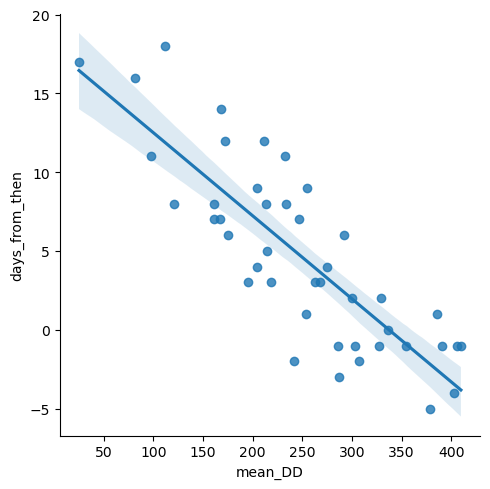

In [ ]:
# pivoted = likelihoodDF.pivot(index='forecast_day_past_march1', columns='days_from_then', values='mean_DD')
sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1==60], y='days_from_then', x='mean_DD')

Text(41.31482827771349, 0.5, 'Breakup in ... days')

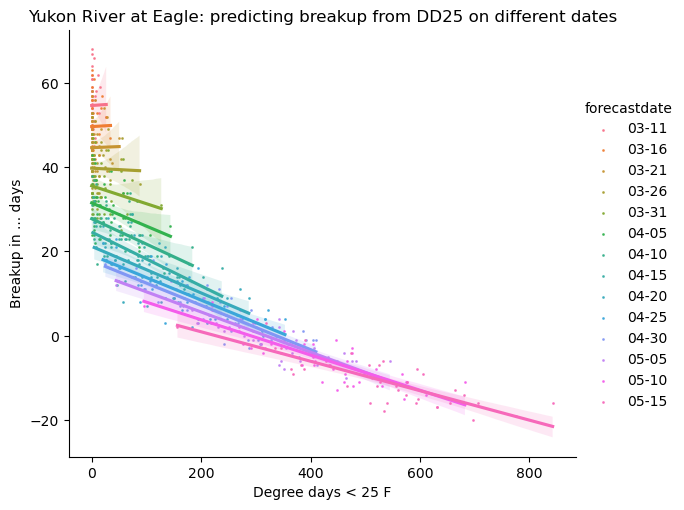

In [ ]:
sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1 % 5 == 0], 
           hue='forecastdate', y='days_from_then', x='mean_DD', 
           scatter=True, scatter_kws={"s": 1},
           aspect=1.2,
           )
plt.title(f"Yukon River at Eagle: predicting breakup from {prefix} on different dates")
plt.xlabel('Degree days < 25 F')
plt.ylabel("Breakup in ... days")

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days in possible_days:
    days_possible = days + days_after_march_1
    years = breakup[breakup['days_since_march1']==days].year.astype(str).to_list()
    if years != []:
        records.append(
            {'days_after_march_1': days_after_march_1,
                'days_from_then': days,
                'mean_DD': mean_eagle[years].mean(axis=1)[days_after_march_1]}
        )

In [ ]:
mean_eagle[['2014', '2019']].mean(axis=1)[0]

0.0

<AxesSubplot: xlabel='d_since_march1'>

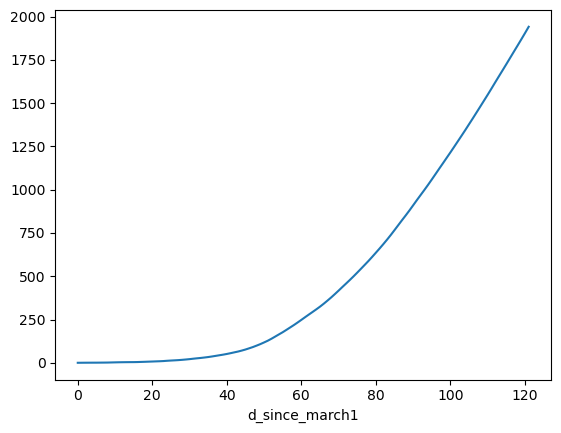

In [ ]:
mean_eagle.mean(axis=1).plot()

<AxesSubplot: xlabel='d_since_march1'>

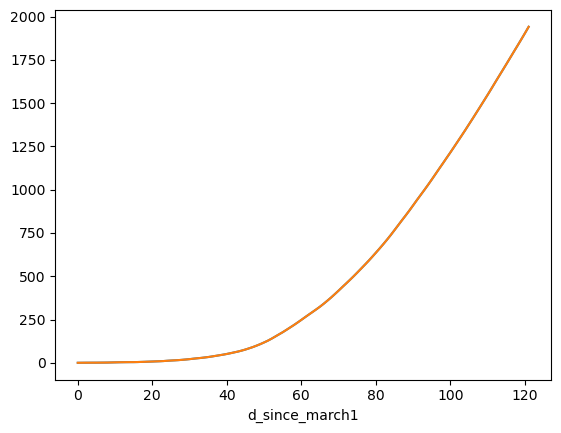

In [ ]:
mean_eagle1 = pd.concat(stationsdfs.values())
mean_eagle1 = mean_eagle1.groupby(mean_eagle1.index).mean()
ax = mean_eagle1.mean(axis=1).plot()
mean_eagle.mean(axis=1).plot(ax=ax)

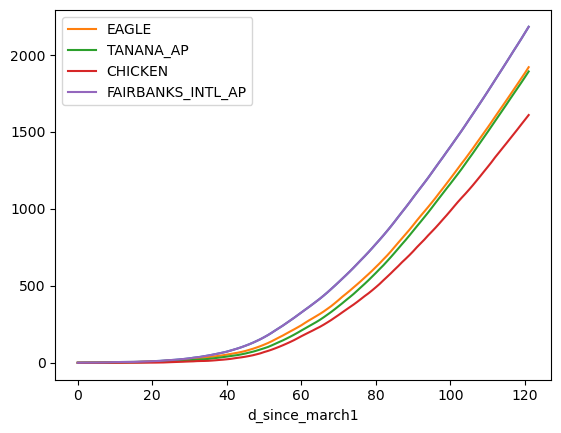

In [ ]:
ax = stationsdfs['FAIRBANKS_INTL_AP'].mean(axis=1).plot()
for key in stationsdfs.keys():
    stationsdfs[key].mean(axis=1).plot(ax=ax, label=key)
plt.legend()

## Make a combined dataset for stationdata

In [ ]:
sites = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AIRPORT', 'NENANA_MUN_AP']

In [ ]:
stationsdfs = {}
stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
for station in sites2:
    stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)